# Evaluation

In [30]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

## Target split

In [25]:
maintenance = pd.read_csv("predictive_maintenance_prepared.csv")

<AxesSubplot: ylabel='Target'>

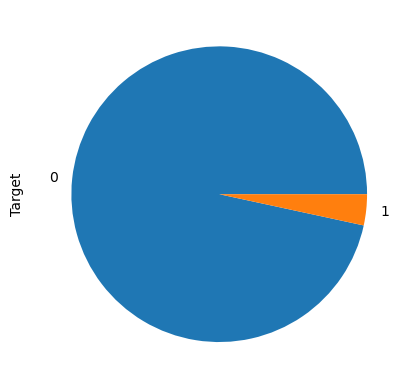

In [26]:
maintenance['Target'].value_counts().plot(kind='pie')

As we can see in the pie chart above, we have way more Targets of value 0 than Targets of value 1. This means we have to split the data evenly into a test- and a training set. Due to the limited amount of Target 1s a validation set would reduce the data too much.

In [27]:
maintenance['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

## Splitting data

For demonstrative purposes, the data will not be split evenly at first.

In [28]:
maintenance.describe()

,Id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.500300,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,0.671301,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,0.00000,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2499.75000,0.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,4999.50000,0.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7499.25000,1.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,9999.00000,2.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [29]:
X = maintenance[['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = maintenance['Target']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=20)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 97.84%


The accuracy is already at 97.84% without any adjustments. Let's take a look at the decision tree structure and the training data set.

### Analysing the data and the first decision tree

In [42]:
tree_as_text = tree.export_text(dt_model, feature_names=list(maintenance.columns[1:-1]))
print(tree_as_text)

|--- Torque [Nm] <= 65.05
|   |--- Torque [Nm] <= 13.15
|   |   |--- Process temperature [K] <= 313.30
|   |   |   |--- Type <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Type >  1.50
|   |   |   |   |--- Process temperature [K] <= 309.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Process temperature [K] >  309.00
|   |   |   |   |   |--- class: 1
|   |   |--- Process temperature [K] >  313.30
|   |   |   |--- class: 0
|   |--- Torque [Nm] >  13.15
|   |   |--- Rotational speed [rpm] <= 1380.50
|   |   |   |--- Air temperature [K] <= 301.55
|   |   |   |   |--- Tool wear [min] <= 199.50
|   |   |   |   |   |--- Torque [Nm] <= 60.65
|   |   |   |   |   |   |--- Tool wear [min] <= 188.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Tool wear [min] >  188.50
|   |   |   |   |   |   |   |--- Process temperature [K] <= 311.70
|   |   |   |   |   |   |   |   |--- Rotational speed [rpm] <= 1281.00
|   |   |   |   |   |   |   |   |   |--- class: 1

In [37]:
X_train.info()
print('-----------')
y_train.info()
print('Unique values')
y_train.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 2294 to 4367
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     7500 non-null   float64
 1   Air temperature [K]      7500 non-null   float64
 2   Process temperature [K]  7500 non-null   float64
 3   Rotational speed [rpm]   7500 non-null   int64  
 4   Torque [Nm]              7500 non-null   float64
 5   Tool wear [min]          7500 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 410.2 KB
-----------
<class 'pandas.core.series.Series'>
Int64Index: 7500 entries, 2294 to 4367
Series name: Target
Non-Null Count  Dtype
--------------  -----
7500 non-null   int64
dtypes: int64(1)
memory usage: 117.2 KB
Unique values


0    7243
1     257
Name: Target, dtype: int64

In [44]:
X_test.info()
print('-----------')
y_test.info()
print('Unique values')
y_test.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 9957 to 6961
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     2500 non-null   float64
 1   Air temperature [K]      2500 non-null   float64
 2   Process temperature [K]  2500 non-null   float64
 3   Rotational speed [rpm]   2500 non-null   int64  
 4   Torque [Nm]              2500 non-null   float64
 5   Tool wear [min]          2500 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 136.7 KB
-----------
<class 'pandas.core.series.Series'>
Int64Index: 2500 entries, 9957 to 6961
Series name: Target
Non-Null Count  Dtype
--------------  -----
2500 non-null   int64
dtypes: int64(1)
memory usage: 39.1 KB
Unique values


0    2418
1      82
Name: Target, dtype: int64

As we can see and have predicted, the ratio between Target 1 and Target 0 is totally imbalanced between the test and training set. So let's split it evenly.

## Splitting the data evenly

In [52]:
X = maintenance[maintenance.columns[1:-1]]
y = maintenance['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3, stratify=y)

array([<AxesSubplot: ylabel='0'>], dtype=object)

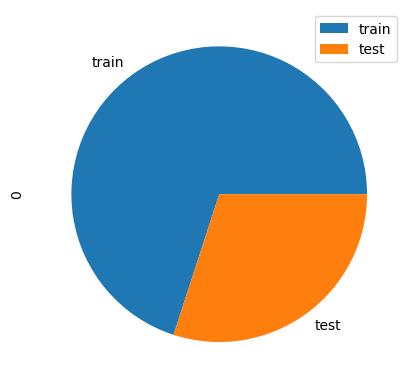

In [53]:
pd.DataFrame([len(y_train), len(y_test)], index=['train', 'test']).plot(kind='pie', subplots=True)

<AxesSubplot: title={'center': 'test'}, ylabel='Target'>

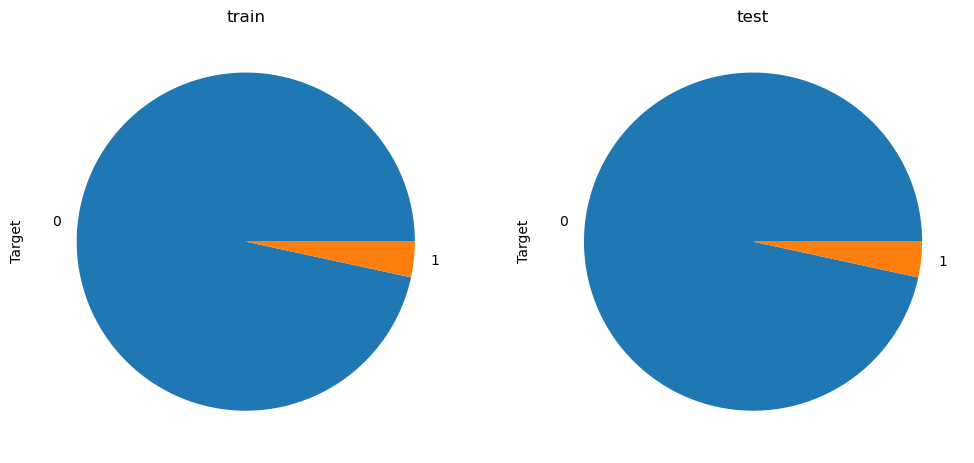

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_test.value_counts().plot(kind='pie', ax=ax2, title='test')

In [58]:
print('Train dataset target amount: ')
y_train.value_counts()

Train dataset target amount: 


0    6763
1     237
Name: Target, dtype: int64

In [59]:
print('Test dataset target amount: ')
y_test.value_counts()

Test dataset target amount: 


0    2898
1     102
Name: Target, dtype: int64

### Making a new decision tree with balanced data

In [60]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2%}'.format(accuracy_score))

Accuracy: 98.13%


With the balanced data the accuracy got even higher.

In [66]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1

    for curr_max_depth in range(1, 20):
        dt_model = DecisionTreeClassifier(max_depth=curr_max_depth, random_state=20)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)

        accuracy_score = metrics.accuracy_score(y_val, y_pred)

        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = curr_max_depth

        if do_print:
            print('max depth {}: {:.2%} accuracy on test set.'.format(curr_max_depth, accuracy_score))
    if do_print:
        print('-' * 20)
        print('best max depth {} has {:.2%} accuracy.'.format(result,accuracy_max))

    return result

In [67]:
best_max_depth = train_and_find_best_depth(X_train ,X_test, y_train, y_test, True)

max depth 1: 97.00% accuracy on test set.
max depth 2: 97.17% accuracy on test set.
max depth 3: 97.20% accuracy on test set.
max depth 4: 97.40% accuracy on test set.
max depth 5: 97.60% accuracy on test set.
max depth 6: 97.87% accuracy on test set.
max depth 7: 98.43% accuracy on test set.
max depth 8: 98.40% accuracy on test set.
max depth 9: 98.43% accuracy on test set.
max depth 10: 98.43% accuracy on test set.
max depth 11: 98.43% accuracy on test set.
max depth 12: 98.43% accuracy on test set.
max depth 13: 98.43% accuracy on test set.
max depth 14: 98.43% accuracy on test set.
max depth 15: 98.43% accuracy on test set.
max depth 16: 98.30% accuracy on test set.
max depth 17: 98.23% accuracy on test set.
max depth 18: 98.23% accuracy on test set.
max depth 19: 98.27% accuracy on test set.
--------------------
best max depth 15 has 98.43% accuracy.


According to the output the best depth ist 15, although about the same accuracy can be achieved with only a depth of 7.